In [1]:
import torch
from transformers import pipeline
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

In [2]:
depth_pipe = pipeline(task="depth-estimation", model="LiheYoung/depth-anything-small-hf")
image = Image.open("/home/jasonah/data/road/frame000260.png")

config.json:   0%|          | 0.00/954 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/99.2M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/437 [00:00<?, ?B/s]

In [3]:
depth = depth_pipe(image)

In [4]:
depth_img = np.array(depth['depth'])


In [5]:
def remove_zeros(arr):
    return arr[arr != 0]

In [7]:
print("SHAPE: ", depth_img.shape)

SHAPE:  (720, 1280)


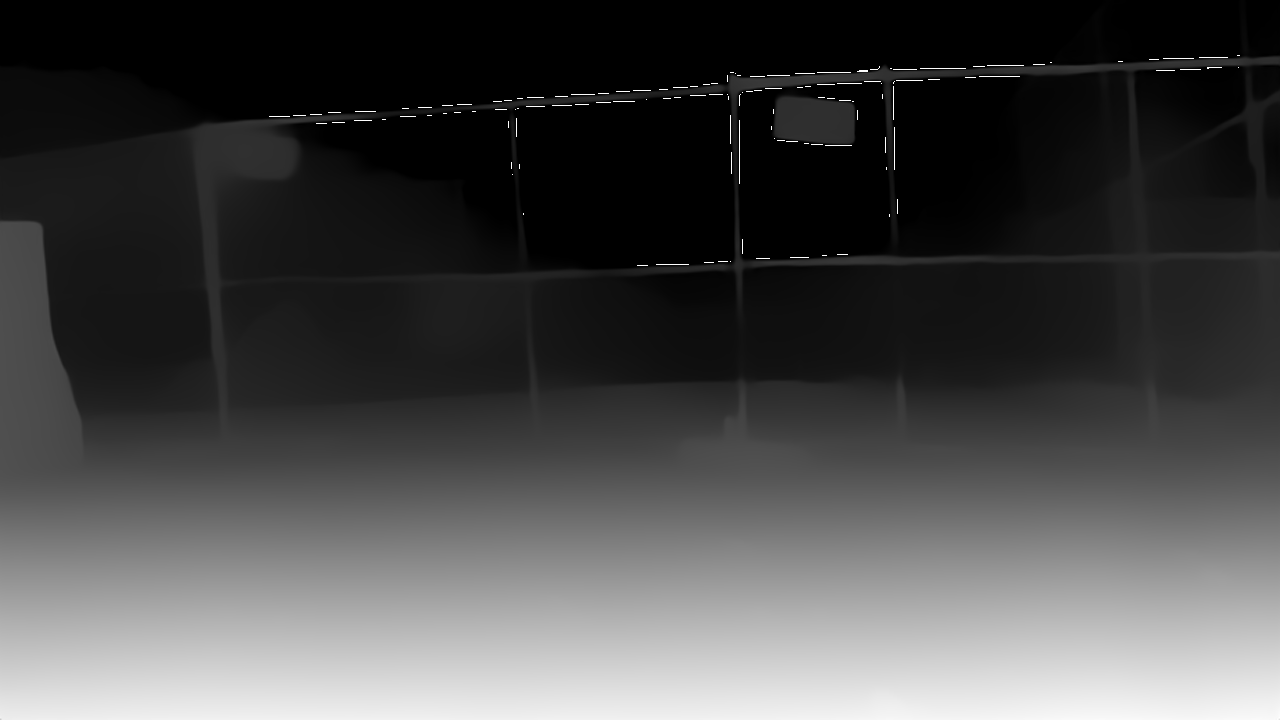

In [8]:
depth["depth"]

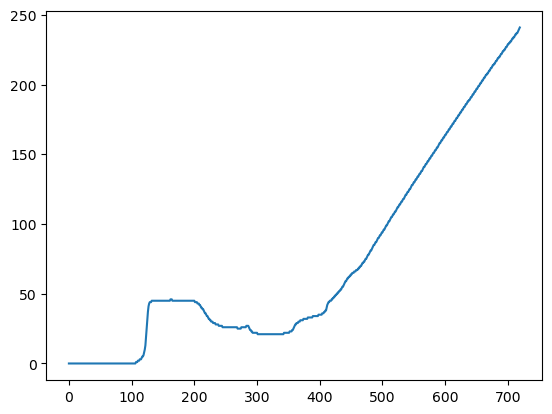

In [15]:
%matplotlib inline
#for i in range(0,depth_img.shape[1],1000):
#    col = remove_zeros(depth_img.T[i])
#    plt.plot(np.arange(len(col)), col)

col = depth_img.T[200]
plt.plot(np.arange(len(col)), col)